<a href="https://colab.research.google.com/github/spencer18001/Clustering-And-Dimensionality-Reduction---Deep-Dive/blob/main/04/0409.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## KMeans, StandardScaler and ARI in sklearn

In [ ]:
# sklearn imports
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score

# pandas and numpy imports
import pandas as pd
import numpy as np

# plotting imports
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# set sns theme and set pandas to display all rows and columns
sns.set_theme()

### Load Iris dataset - data exploration and preprocessing


- The Iris dataset is a classic and widely used dataset in machine learning and statistics.

- The dataset consists of measurements of four attributes of three different species of iris flowers:
  - setosa
  - versicolor
  - virginica
  
 </br>
  
- The four attributes measured for each flower are sepal length, sepal width, petal length, and petal width, all in centimeters.
  
- The dataset contains 150 observations, with 50 observations for each of the three species.


In [ ]:
# Load iris dataset
iris = load_iris()

print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
print(iris['data'])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print(iris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
print(iris['target_names'])

['setosa' 'versicolor' 'virginica']


### Data analysis

In [ ]:
# Create dataset df
iris_df = pd.DataFrame(
    iris['data'],
    columns=iris['feature_names']
)

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris_df.shape

(150, 4)

In [ ]:
iris_df.isna().sum().T

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [ ]:
# Summary statistics
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


Text(0.5, 0.98, 'Iris histograms')

<Figure size 640x480 with 0 Axes>

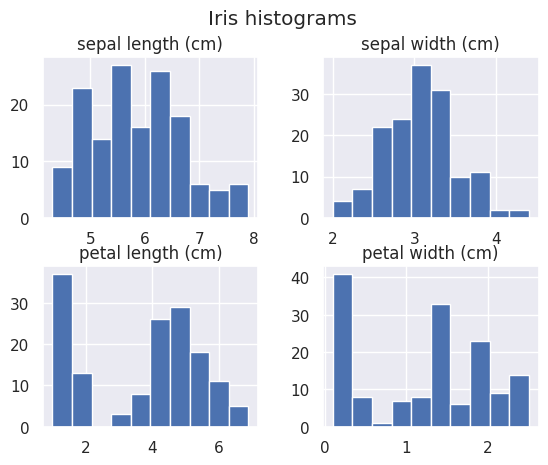

In [ ]:
# Plot features
plt.figure()
iris_df.hist()
plt.suptitle("Iris histograms")

<Axes: >

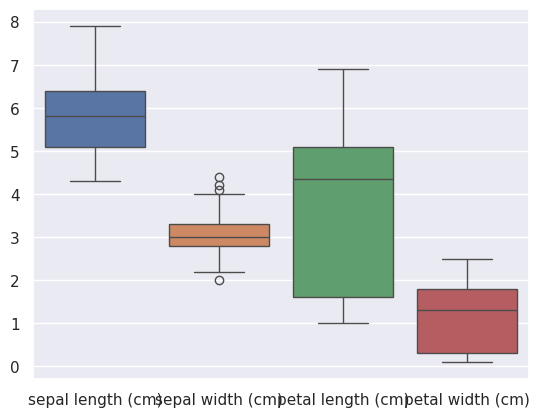

In [ ]:
# Data boxplots
sns.boxplot(iris_df)

### Simplify the dataset

To demonstrate a simple clustering example, we will retain only the 'petal length (cm)' and 'petal width (cm)' features and focus on the Setosa and Virginica species from the Iris dataset. We will keep only these two dimensions to easily visualize the clustering results in a 2D plot.

In [ ]:
# Add label to the dataset
iris_df['label'] = [iris['target_names'][target] for target in iris['target']]

# Remove versicolor class
iris_df = iris_df[iris_df['label'] != 'versicolor']

# Keep only petal length and petal width
iris_df = iris_df.filter(
    items=[
        'petal length (cm)',
        'petal width (cm)',
        'label'
    ]
)

Text(0.5, 1.0, 'Data subset - raw features')

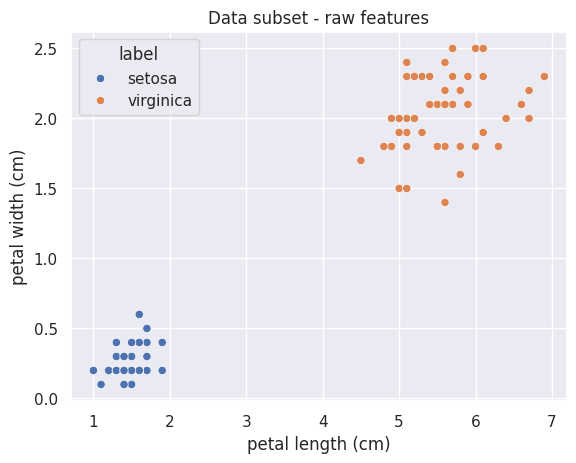

In [ ]:
# Scatterplot
sns.scatterplot(
    iris_df,
    x='petal length (cm)',
    y='petal width (cm)',
    hue='label'
)

plt.title('Data subset - raw features')

## Cluster the dataset without data scaling

Even though scaling data is important preprocessing step for K-means clustering, following cell demonstrates that given the nautre of the data, K-means clustering can work just fine even without data scaling.

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

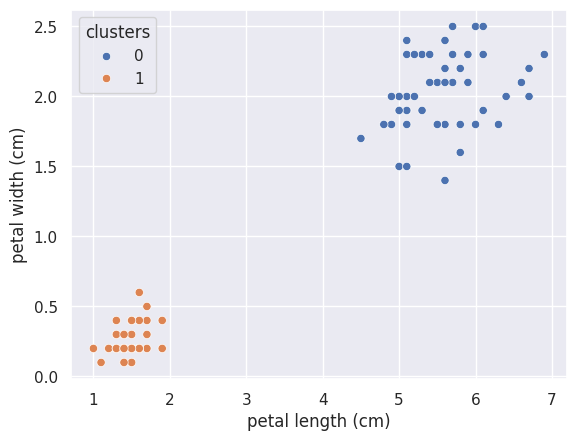

In [ ]:
# Prepare K-means clustering input
cluster_data = iris_df[['petal length (cm)', 'petal width (cm)']]

# Run K-means clustering with k=2
kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(cluster_data)

# Extract cluster id for each data point
iris_df['clusters'] = kmeans.predict(cluster_data)

# Plot clustering
sns.scatterplot(
    iris_df,
    x='petal length (cm)',
    y='petal width (cm)',
    hue='clusters'
)

### Adjusted rand index for clustering comparison

Sklearn **adjusted_rand_score** function can be used to compare clustering and labels even when clustering and labels have different formats (e.g. cluster ids are integers while label ids are strings).

In [ ]:
# Label values
iris_df['label'].to_numpy()

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virg

In [ ]:
# Cluster values
iris_df['clusters'].to_numpy()

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
# Adjusted rand index - value of 1 means that original labels and clustering results match perfectly.
adjusted_rand_score(iris_df['label'].to_numpy(), iris_df['clusters'].to_numpy())

1.0

## Clustering with data scaling

In this section, we will perform clustering on scaled data.

Standard scaling, also known as Z-score normalization, is a data preprocessing technique that transforms features by centering them around the mean and scaling them to have a standard deviation of one, ensuring that all features contribute equally to the analysis and mitigating the influence of large variations in the original data.

Text(0.5, 1.0, 'Scaled data')

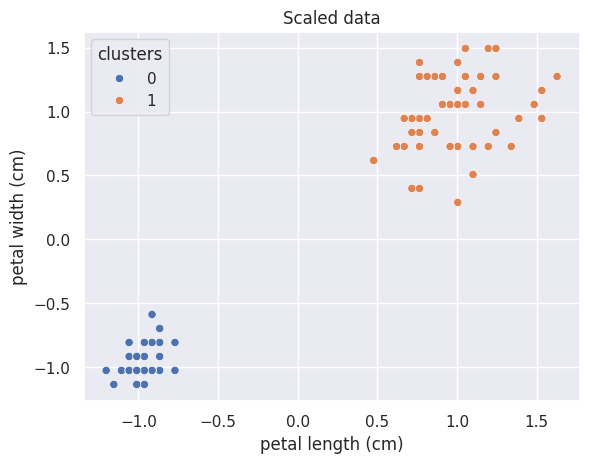

In [ ]:
# Prepare the input data
cluster_data = iris_df[['petal length (cm)', 'petal width (cm)']]

# Scale the data
standard_scaler = StandardScaler()
standard_scaler.fit(cluster_data)
cluster_data = standard_scaler.transform(cluster_data)
cluster_data = pd.DataFrame(
    cluster_data,
    columns = ['petal length (cm)', 'petal width (cm)']
)

# Run K-means clustering with k=2
kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(cluster_data)

# Extract cluster assignment for each data point
cluster_data['clusters'] = kmeans.predict(cluster_data)

# Plot clustering
sns.scatterplot(
    cluster_data,
    x='petal length (cm)',
    y='petal width (cm)',
    hue=cluster_data['clusters']
)

plt.title('Scaled data')

In [ ]:
# Adjusted rand index - value of 1 means that original labels and clustering results match perfectly.
adjusted_rand_score(
    iris_df['label'].to_numpy(),
    # iris_df['clusters'].to_numpy()
    cluster_data['clusters'].to_numpy()
) # todo_spencer

1.0